## Recommending The Next Book To Read

DataSource: https://www.kaggle.com/datasets/meetnaren/goodreads-best-books/download

In [1]:
# EDA & Data Handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes
import dill

# Modeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### import data

In [2]:
books_df = pd.read_csv('../data/book_data.csv')
books_df.shape

(54301, 12)

In [3]:
books_df.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


In [4]:
books_df.columns

Index(['book_authors', 'book_desc', 'book_edition', 'book_format', 'book_isbn',
       'book_pages', 'book_rating', 'book_rating_count', 'book_review_count',
       'book_title', 'genres', 'image_url'],
      dtype='object')

In [5]:
books_df.isnull().sum()

book_authors             0
book_desc             1331
book_edition         48848
book_format           1656
book_isbn            12866
book_pages            2522
book_rating              0
book_rating_count        0
book_review_count        0
book_title               0
genres                3242
image_url              683
dtype: int64

In [6]:
books_df[books_df['book_rating_count'] > 10000]

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...
...,...,...,...,...,...,...,...,...,...,...,...,...
54168,Paco Underhill,Is there a method to our madness when it comes...,NaN,Paperback,9.78068E+12,256 pages,3.90,11103,471,Why We Buy: The Science of Shopping,Business|Nonfiction|Psychology|Economics|Scien...,https://images.gr-assets.com/books/1439821096l...
54172,P.C. Cast|Kim Doner,"Merry meet, fledgling. Welcome to a new life, ...",NaN,Paperback,9.78031E+12,157 pages,3.88,10123,351,The Fledgling Handbook 101,Paranormal|Vampires|Young Adult|Fantasy|Fantas...,https://images.gr-assets.com/books/1317793022l...
54250,Sherrilyn Kenyon|Amanda Ashley|L.A. Banks|Lori...,Winter Born by Sherrilyn KenyonTwo enemy Were-...,NaN,Mass Market Paperback,9.78031E+12,368 pages,4.16,10245,178,Stroke of Midnight,Fantasy|Paranormal|Romance|Paranormal Romance|...,https://images.gr-assets.com/books/1386922879l...
54260,Karl Ove Knausgård,Här fortsätter Karl Ove Knausgårds mäktiga aou...,NaN,Paperback,9.78919E+12,595 pages,4.32,11718,1001,Min kamp 2,Fiction|Novels|European Literature|Scandinavia...,https://images.gr-assets.com/books/1350031656l...


In [7]:
books_df.dropna(subset=['genres'],axis=0,inplace=True)

In [8]:
books_df.isnull().sum()

book_authors             0
book_desc              882
book_edition         45986
book_format           1347
book_isbn            11046
book_pages            1946
book_rating              0
book_rating_count        0
book_review_count        0
book_title               0
genres                   0
image_url              380
dtype: int64

In [9]:
books_df=books_df[((books_df['book_format'] == 'Paperback') | (books_df['book_format'] == 'Hardcover')) & (books_df['book_rating_count'] > 10000)]

In [10]:
books_df=books_df[['book_authors','book_rating','book_rating_count','book_title','genres','image_url']]

In [11]:
books_df.shape

(12181, 6)

In [12]:
books_df.head()

,book_authors,book_rating,book_rating_count,book_title,genres,image_url
0,Suzanne Collins,4.33,5519135,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,4.48,2041594,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,4.27,3745197,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,4.25,2453620,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,3.58,4281268,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


## Exploratory Data Analysis

In [13]:
books_df['avg_rating'] = books_df['book_rating']/books_df['book_rating_count']
books_df.head(10)

,book_authors,book_rating,book_rating_count,book_title,genres,image_url,avg_rating
0,Suzanne Collins,4.33,5519135,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,7.845432e-07
1,J.K. Rowling|Mary GrandPré,4.48,2041594,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,2.194364e-06
2,Harper Lee,4.27,3745197,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,1.140127e-06
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,4.25,2453620,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...,1.732135e-06
4,Stephenie Meyer,3.58,4281268,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...,8.362009e-07
5,Markus Zusak,4.36,1485632,The Book Thief,Historical|Historical Fiction|Fiction|Young Adult,https://images.gr-assets.com/books/1522157426l...,2.934778e-06
6,C.S. Lewis|Pauline Baynes,4.25,437829,The Chronicles of Narnia,Fantasy|Classics|Fiction|Young Adult|Childrens,https://images.gr-assets.com/books/1449868701l...,9.706986e-06
7,George Orwell,3.90,2235084,Animal Farm,Classics|Fiction|Science Fiction|Dystopia|Fant...,https://images.gr-assets.com/books/1424037542l...,1.744901e-06
8,Margaret Mitchell,4.29,969181,Gone with the Wind,Classics|Historical|Historical Fiction|Fiction...,https://images.gr-assets.com/books/1328025229l...,4.426418e-06
10,John Green,4.24,2881648,The Fault in Our Stars,Young Adult|Fiction|Romance|Contemporary,https://images.gr-assets.com/books/1360206420l...,1.471380e-06


In [14]:
# top 10 books
top_books_df=books_df.sort_values(by=['book_rating_count','book_rating'],ascending=False).head(100)
top_books_df.head(10)

,book_authors,book_rating,book_rating_count,book_title,genres,image_url,avg_rating
50,J.K. Rowling|Mary GrandPré,4.46,5588580,Harry Potter and the Sorcerer's Stone,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1474154022l...,7.980560e-07
44271,Suzanne Collins,4.33,5523413,Los juegos del hambre,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1335891621l...,7.839356e-07
28154,Suzanne Collins|Ina Jakaitė,4.33,5522714,Bado žaidynės,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1303117363l...,7.840348e-07
25990,Suzanne Collins|Sevinç Tezcan Yanar,4.33,5522513,Açlık Oyunları,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1275904617l...,7.840633e-07
21895,Suzanne Collins|Fabio Paracchini|Simona Brogli,4.33,5522483,Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1335446608l...,7.840676e-07
21678,Suzanne Collins,4.33,5522458,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1327962782l...,7.840712e-07
22255,Suzanne Collins,4.33,5522232,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1311332303l...,7.841032e-07
21726,Suzanne Collins|Maria Postema,4.33,5522182,De Hongerspelen,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1300957619l...,7.841103e-07
14936,Suzanne Collins,4.33,5521568,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1327089453l...,7.841975e-07
0,Suzanne Collins,4.33,5519135,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,7.845432e-07


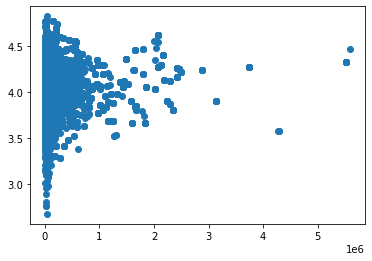

In [15]:
# Visualize the correlation between rating and number of ratings
fig, ax = plt.subplots()
ax.scatter(books_df['book_rating_count'],books_df['book_rating'])

plt.show()
# less number of ratings result in higher overall rating. the more number of ratings, the rating tends to hover around 4 out of 5

In [16]:
books_df.columns.to_list()

['book_authors',
 'book_rating',
 'book_rating_count',
 'book_title',
 'genres',
 'image_url',
 'avg_rating']

In [17]:
# Remove duplicates from title since that is the field we will recommend
books_df.drop_duplicates('book_title', inplace = True)
books_df.reset_index(inplace=True)

In [18]:
# view the data
books_df.head()

,index,book_authors,book_rating,book_rating_count,book_title,genres,image_url,avg_rating
0,0,Suzanne Collins,4.33,5519135,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,7.845432e-07
1,1,J.K. Rowling|Mary GrandPré,4.48,2041594,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,2.194364e-06
2,2,Harper Lee,4.27,3745197,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,1.140127e-06
3,3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,4.25,2453620,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...,1.732135e-06
4,4,Stephenie Meyer,3.58,4281268,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...,8.362009e-07


## Build the Recommendation System

In [19]:
# Setup vectorizer. Using Count vectorizer to 
cvect = CountVectorizer(stop_words=None)

X = cvect.fit_transform(books_df['book_authors']+' '+books_df['genres']).toarray()

df = pd.DataFrame(X, columns=cvect.get_feature_names(), index=books_df.index)
df.shape


(10209, 7746)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvect = TfidfVectorizer(stop_words=None)

Xt = tvect.fit_transform(books_df['book_authors']+' '+books_df['genres']).toarray()

dft = pd.DataFrame(Xt, columns=tvect.get_feature_names(), index=books_df.index)
dft.shape

(10209, 7746)

In [21]:
# Find similar books using cosine_similarity
cosine_sim_reads = cosine_similarity(dft, dft)
cosine_sim_reads


array([[1.        , 0.11854149, 0.05572966, ..., 0.07176301, 0.08627994,
        0.04091676],
       [0.11854149, 1.        , 0.0195483 , ..., 0.        , 0.09079328,
        0.01435238],
       [0.05572966, 0.0195483 , 1.        , ..., 0.        , 0.        ,
        0.02603462],
       ...,
       [0.07176301, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.08627994, 0.09079328, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.04091676, 0.01435238, 0.02603462, ..., 0.        , 0.        ,
        1.        ]])

In [22]:
# Find similar books using cosine_similarity
cosine_sim_reads_cnt = cosine_similarity(df, df)
cosine_sim_reads_cnt

array([[1.        , 0.52026598, 0.38177086, ..., 0.16222142, 0.24525574,
        0.41502868],
       [0.52026598, 1.        , 0.20965697, ..., 0.        , 0.40406102,
        0.22792115],
       [0.38177086, 0.20965697, 1.        , ..., 0.        , 0.        ,
        0.3344968 ],
       ...,
       [0.16222142, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.24525574, 0.40406102, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.41502868, 0.22792115, 0.3344968 , ..., 0.        , 0.        ,
        1.        ]])

In [23]:
# Construct a reverse map of indices and book titles or genres

def getindxmap(field, title):
    if field == 'genres':
        for i in range(len(title)):
            if i == 0:
                indx = books_df[field].str.contains(title[i])
            else:
                indx = indx & books_df[field].str.contains(title[i])
    else:
        indx = books_df[field].str.contains(title)
    return pd.Series(books_df.index, index = indx).drop_duplicates()

# Function that takes in book titles or genres as input and outputs most similar book titles

def get_read_recommend(field, title, cosine_sim):
    print_books_df=pd.DataFrame()
    
    indices = getindxmap(field,title)

    cs = cosine_sim[indices[True]]
    if isinstance(cs[0], np.ndarray):
        for ind in cs:
            sim_reads = list(enumerate(ind))
            sim_reads = sorted(sim_reads, key = lambda x: x[1], reverse = True)
            sim_reads = sim_reads[1:11]
            book_loc = [i[0] for i in sim_reads]
            print_books_df = print_books_df.append(books_df[['book_title','book_authors','genres','book_rating','book_rating_count']].iloc[book_loc])
    else:
        sim_reads = list(enumerate(cs))
        sim_reads = sorted(sim_reads, key = lambda x: x[1], reverse = True)
        sim_reads = sim_reads[1:11]
        book_loc = [i[0] for i in sim_reads]
        print_books_df = print_books_df.append(books_df[['book_title','book_authors','genres','book_rating','book_rating_count']].iloc[book_loc])

    return print_books_df.sort_values(['book_rating_count','book_rating'],ascending=False).drop_duplicates('book_title').head(10)

In [24]:
# get recommendations based on tfidf vectorizer
get_read_recommend('genres',['History'], cosine_sim_reads)

,book_title,book_authors,genres,book_rating,book_rating_count
9106,Spaar de spotvogel,Harper Lee,Classics|Fiction|Historical|Historical Fiction...,4.27,3748104
7733,لا تقتل عصفوراً ساخراً,Harper Lee|توفيق الأسدي,Classics|Fiction|Historical|Historical Fiction...,4.27,3747354
2,To Kill a Mockingbird,Harper Lee,Classics|Fiction|Historical|Historical Fiction...,4.27,3745197
24,The Great Gatsby,F. Scott Fitzgerald,Classics|Fiction|Academic|School|Literature|Hi...,3.90,3141842
8134,۱۹۸۴ هزار و نهصد و هشتاد و چهار,George Orwell|صالح حسینی,Classics|Fiction|Science Fiction|Science Ficti...,4.16,2423041
4365,Nineteen Eighty-Four,George Orwell|Thomas Pynchon,Classics|Fiction|Science Fiction|Science Ficti...,4.16,2421777
9857,O Diário de Anne Frank,Anne Frank,Nonfiction|Classics|History|Biography|Autobiog...,4.12,2288853
9343,The Diary of a Young Girl,Anne Frank|Cherry Gilchrist,Nonfiction|Classics|History|Biography|Autobiog...,4.12,2288727
8869,Ana Frank Diario,Anne Frank,Nonfiction|Classics|History|Biography|Autobiog...,4.12,2288542
6994,Het Achterhuis: Het dagboek van Anne Frank,Anne Frank,Nonfiction|Classics|History|Biography|Autobiog...,4.12,2288123


In [25]:
# get recommendations based on count vectorizer
get_read_recommend('genres',['History'], cosine_sim_reads_cnt)

,book_title,book_authors,genres,book_rating,book_rating_count
9857,O Diário de Anne Frank,Anne Frank,Nonfiction|Classics|History|Biography|Autobiog...,4.12,2288853
9343,The Diary of a Young Girl,Anne Frank|Cherry Gilchrist,Nonfiction|Classics|History|Biography|Autobiog...,4.12,2288727
8869,Ana Frank Diario,Anne Frank,Nonfiction|Classics|History|Biography|Autobiog...,4.12,2288542
6994,Het Achterhuis: Het dagboek van Anne Frank,Anne Frank,Nonfiction|Classics|History|Biography|Autobiog...,4.12,2288123
7,Animal Farm,George Orwell,Classics|Fiction|Science Fiction|Dystopia|Fant...,3.90,2235084
8,Gone with the Wind,Margaret Mitchell,Classics|Historical|Historical Fiction|Fiction...,4.29,969181
610,Night,Elie Wiesel|Marion Wiesel|François Mauriac,Nonfiction|Classics|History|Autobiography|Memo...,4.31,816764
6892,Seelen,Stephenie Meyer,Science Fiction|Fiction|Young Adult|Science Fi...,3.84,812606
5835,Les Âmes vagabondes,Stephenie Meyer,Science Fiction|Fiction|Young Adult|Science Fi...,3.84,812594
437,The Host,Stephenie Meyer,Science Fiction|Fiction|Young Adult|Science Fi...,3.84,812483


In [26]:
pd.set_option('display.max_colwidth', None)
books_df['genres'][books_df['book_title'] == "Los juegos del hambre"]

9418    Young Adult|Fiction|Science Fiction|Dystopia|Fantasy|Science Fiction|Romance|Adventure|Young Adult|Teen|Apocalyptic|Post Apocalyptic|Action
Name: genres, dtype: object

In [27]:
# save the cosine similarity array
file = open(f'../resources/cosine_sim_reads.pkl', 'wb')
pd.to_pickle(cosine_sim_reads, file)
file.close()


In [28]:
# save as a pickle file.
file = open(f'../resources/next_read.pkl', 'wb')
dill.dump(get_read_recommend, file, recurse=True)
file.close()


In [29]:
# save the dataset
file = open(f'../resources/good_books.pkl', 'wb')
pd.to_pickle(books_df, file)
file.close()